#### packages to install if using google collab (will likely need to restart after installing):

In [1]:
!pip install imutils
!pip install super_gradients==3.0.7
!pip install albumentations
!pip install split-folders[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 794.1/794.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 59.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 117.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 8.5

In [2]:
!pip install super_gradients

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 89.0 MB/s eta 0:00:00
  Using cached boto3-1.34.113-py3-none-any.whl (139 kB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl (9.6 kB)
  Using cached coverage-5.3.1-cp310-cp310-linux_x86_64.whl
  Using cached Sphinx-4.0.3-py3-none-any.whl (2.9 MB)
  Using cached sphinx_rtd_theme-2.0.0-py2.py3-none-any.whl (2.8 MB)
  Using cached torchmetrics-0.8.0-py3-none-any.whl (408 kB)
  Using cached hydra_core-1.3.2-py3-none-any.whl (154 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 105.5 MB/s eta 0:00:00
  Using cached onnx-1.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 127.5 MB/s eta 0:00:00
  Using cached einops-0.3.2-py3-none-any.whl (25 kB)
  Using cached treelib-1.6.1-py3-none-any.whl
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached stringcase-1.2.0-py3-none-a

#### regular imports

In [1]:
import math
import random
from typing import Dict, List,Tuple
import requests

from super_gradients.training.metrics import Accuracy, Top5
import time

import numpy as np
import matplotlib.pyplot as plt
import glob
from pathlib import Path, PurePath
import pathlib
import pandas as pd

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets
from torchvision import transforms

from PIL import Image

import albumentations as A
from albumentations.pytorch import ToTensorV2

from sklearn.model_selection import train_test_split

from imutils import paths

import splitfolders
import textwrap

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
import seaborn as sns
from sklearn.metrics import classification_report, f1_score
import random
from PIL import Image

import super_gradients
from super_gradients.common.object_names import Models
from super_gradients.training import Trainer
from super_gradients.training import training_hyperparams
from super_gradients.training.metrics.classification_metrics import Accuracy, Top5
from super_gradients.training.utils.early_stopping import EarlyStop
from super_gradients.training import models
from super_gradients.training.utils.callbacks import Phase

[2024-05-27 07:47:42] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2024-05-27 07:47:48] INFO - utils.py - NumExpr defaulting to 8 threads.


#### Timer:

In [2]:
import time

# Define a start time variable
global_start_time = None

def start_timer():
    global global_start_time
    global_start_time = time.time()
    print("Start time recorded.")

def end_timer():
    global global_start_time
    end_time = time.time()
    duration = end_time - global_start_time
    minutes, seconds = divmod(duration, 60)
    hours, minutes = divmod(minutes, 60)
    print(f"Total execution time: {int(hours)} hours, {int(minutes)} minutes, and {int(seconds)} seconds.")

start_timer()


Start time recorded.


## Check if using gpu:

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


#### Configuring Kaggle datasource and Download data

In [5]:
# Set seaborn style for plots
sns.set_style('darkgrid')

# Download and extract the dataset
CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = '100-bird-species:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F534640%2F5468571%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240526%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240526T093952Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1e6bc8e6ce4f714774ff75fee98e90710ed5280580365385490e7e571f866ef0486845ff22d7b2c81ac06a993766d8f4cae64bd15f96a8463908af25bbba4387281516bd5d53b49ee026b682539bdb84cb29adb2a7bea44eabff32018e08bc73f40af09ee9b13ea1a21083c840b32f48d75a80159efa95c526b48ced867d573754b5a3c29ba4f6e2f05aa3ad059cf2ba33d60e6dc4dde14b6cd5834e64477eca9090381d6324e62a6afa6d35720dcd2d268fec1c9266593e4df5fdad6dc0f3089bc591227b6f323408987c07f7254439d50a3ff2f370b8b0fa7d470bea0f5626af1fc5a627c1109e7a46298d99d156a82023f9a74c63f01341db3192e4b1654d'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'
KAGGLE_SYMLINK = 'kaggle'

# Unmount and remove previous input directory if exists
!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# Create symlinks
try:
    os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
    pass
try:
    os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
    pass


In [6]:
# Download and unzip the dataset
for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
                with ZipFile(tfile) as zfile:
                    zfile.extractall(destination_path)
            else:
                with tarfile.open(tfile.name) as tarfile:
                    tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 2099628449 bytes downloaded
Downloaded and uncompressed: 100-bird-species


In [7]:
def count_subdirectories(path: str) -> int:
    """
    Counts the number of subdirectories in the given directory path.
    """
    dir_path = Path(path)
    subdirectories = [f for f in dir_path.iterdir() if f.is_dir()]
    return len(subdirectories)


#### Config
This holds variables for the notebook.

You will define the model (ResNet50 here), training params, image type, number of classes, and
relevant directories in this class.

(Taken From: https://www.kaggle.com/code/harpdeci/classifying-birds-with-resnet)

In [8]:
class config:
    # specify the paths to datasets
    ROOT_DIR = Path('/kaggle/input/100-bird-species')
    TRAIN_DIR = ROOT_DIR.joinpath('train')
    TEST_DIR = ROOT_DIR.joinpath('test')
    VAL_DIR = ROOT_DIR.joinpath('valid')

    # set the input height and width
    INPUT_HEIGHT = 224
    INPUT_WIDTH = 224

    # set the input height and width
    IMAGENET_MEAN = [0.485, 0.456, 0.406]
    IMAGENET_STD = [0.229, 0.224, 0.225]

    IMAGE_TYPE = '.jpg'
    BATCH_SIZE = 128
    MODEL_NAME = 'resnet50'
    DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
    TRAINING_PARAMS = 'training_hyperparams/imagenet_resnet50_train_params'

    NUM_CLASSES = count_subdirectories(TRAIN_DIR)
    CHECKPOINT_DIR = 'checkpoints'

### Check that 525 species have been loaded:

In [10]:
# Count subdirectories and print the number
parent_dir = config.TRAIN_DIR
num_subdirectories = count_subdirectories(parent_dir)
print(f"Number of subdirectories in {parent_dir}: {num_subdirectories}")

# Visualize a sample of images from the dataset
import cv2
from imutils import paths
from pathlib import PurePath

train_image_path_list = list(sorted(paths.list_images(config.TRAIN_DIR)))
train_image_path_sample = random.sample(population=train_image_path_list, k=20)

# def examine_images(images: list):
#     num_images = len(images)
#     num_rows = int(math.ceil(num_images / 5))
#     num_cols = 5

#     fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 30), tight_layout=True)
#     axs = axs.ravel()

#     for i, image_path in enumerate(images[:num_images]):
#         image = Image.open(image_path)
#         label = PurePath(image_path).parent.name
#         axs[i].imshow(image)
#         axs[i].set_title(f"Bird: {label}", fontsize=25)
#         axs[i].axis('off')
#     plt.show()

# examine_images(train_image_path_sample)

Number of subdirectories in /kaggle/input/100-bird-species/train: 525


## Now select top 50 birds:

In [11]:
import os
from collections import Counter

species_count = Counter()

for species_dir in os.listdir(config.TRAIN_DIR):
    species_path = os.path.join(config.TRAIN_DIR, species_dir)
    if os.path.isdir(species_path):
        num_images = len(os.listdir(species_path))
        species_count[species_dir] = num_images

# Print the top 10 species for verification
print(species_count.most_common(10))


In [12]:
# Select the top 50 most common species
top_50_species = [species for species, count in species_count.most_common(50)]
print("Top 50 species:", top_50_species)

Top 50 species: ['RUFOUS TREPE', 'HOUSE FINCH', 'D-ARNAUDS BARBET', 'OVENBIRD', 'ASIAN GREEN BEE EATER', 'SWINHOES PHEASANT', 'WOOD DUCK', 'CASPIAN TERN', 'RED BILLED TROPICBIRD', 'WOOD THRUSH', 'PYRRHULOXIA', 'MERLIN', 'FRILL BACK PIGEON', 'MILITARY MACAW', 'ORNATE HAWK EAGLE', 'OYSTER CATCHER', 'LAUGHING GULL', 'EASTERN YELLOW ROBIN', 'JACOBIN PIGEON', 'GREATER PRAIRIE CHICKEN', 'DARK EYED JUNCO', 'YELLOW BREASTED CHAT', 'RED TAILED HAWK', 'VIOLET GREEN SWALLOW', 'VIOLET BACKED STARLING', 'PLUSH CRESTED JAY', 'SORA', 'LIMPKIN', 'RED KNOT', 'GREY HEADED CHACHALACA', 'BLUE THROATED PIPING GUAN', 'CRIMSON SUNBIRD', 'MARABOU STORK', 'RED BEARDED BEE EATER', 'SAYS PHOEBE', 'CAMPO FLICKER', 'CRESTED WOOD PARTRIDGE', 'KNOB BILLED DUCK', 'ROSE BREASTED COCKATOO', 'NORTHERN PARULA', 'COPPERSMITH BARBET', 'STRIATED CARACARA', 'WILLOW PTARMIGAN', 'BLUE GRAY GNATCATCHER', 'BANDED BROADBILL', 'WOODLAND KINGFISHER', 'AMERICAN DIPPER', 'ROSEATE SPOONBILL', 'VARIED THRUSH', 'RAZORBILL']


In [13]:
from pathlib import Path
def filter_top_species(train_dir, top_species):
    filtered_images = []
    for species in top_species:
        species_dir = Path(train_dir) / species
        if species_dir.is_dir():
            images = list(species_dir.glob('*.jpg')) + list(species_dir.glob('*.jpeg')) + list(species_dir.glob('*.png'))
            filtered_images.extend([(str(image), species) for image in images])
    return filtered_images

# Get filtered images
filtered_images = filter_top_species(config.TRAIN_DIR, top_50_species)

# Print the number of filtered images
print(f"Number of filtered images: {len(filtered_images)}")




Number of filtered images: 10252


In [14]:
from torchvision.datasets import DatasetFolder
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from PIL import Image

class CustomDataset(DatasetFolder):
    def __init__(self, image_tuples, transform=None):
        self.image_tuples = image_tuples
        self.transform = transform
        self.classes = sorted(list(set([label for _, label in image_tuples])))
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}

    def __len__(self):
        return len(self.image_tuples)

    def __getitem__(self, index):
        img_path, label = self.image_tuples[index]
        img = Image.open(img_path).convert('RGB')
        if self.transform:
            img = self.transform(img)
        label_idx = self.class_to_idx[label]
        return img, label_idx

# Initialize transforms
train_transforms = transforms.Compose([
    transforms.Resize((config.INPUT_HEIGHT, config.INPUT_WIDTH)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=config.IMAGENET_MEAN, std=config.IMAGENET_STD)
])

# Create the custom dataset
train_dataset = CustomDataset(filtered_images, transform=train_transforms)

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=config.BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)

print(f"[INFO] Filtered training dataset contains {len(train_dataset)} samples.")
print(f"[INFO] Dataset contains {len(train_dataset.classes)} labels.")

[INFO] Filtered training dataset contains 10252 samples.
[INFO] Dataset contains 50 labels.


In [15]:
# Print the length of the dataset
print(f"Length of the dataset: {len(train_dataset)}")

# Print the first few entries to inspect their structure
for i in range(5):
    img, label = train_dataset[i]
    print(f"Image shape: {img.shape}, Label: {label}")


Length of the dataset: 10252
Image shape: torch.Size([3, 224, 224]), Label: 37
Image shape: torch.Size([3, 224, 224]), Label: 37
Image shape: torch.Size([3, 224, 224]), Label: 37
Image shape: torch.Size([3, 224, 224]), Label: 37
Image shape: torch.Size([3, 224, 224]), Label: 37


## Should print 3 images of birds:

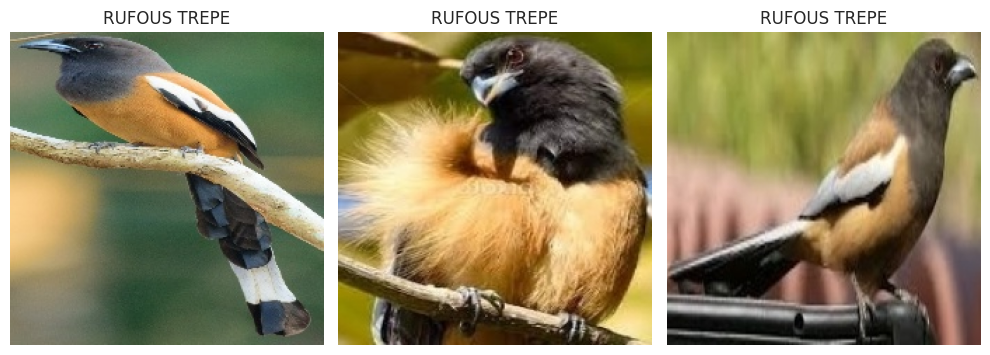

In [20]:
%matplotlib inline


# Function to visualize images
def visualize_images(dataset, num_images=3):
    fig, axes = plt.subplots(1, 3, figsize=(10, 10))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        if i < num_images:
            img, label = dataset[i]
            img = img.permute(1, 2, 0)  # convert CHW to HWC
            img = img * torch.tensor(config.IMAGENET_STD) + torch.tensor(config.IMAGENET_MEAN)  # denormalize
            img = img.numpy()
            ax.imshow(img)
            ax.set_title(dataset.classes[label])
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize some images
visualize_images(train_dataset)


In [17]:
!head ../input/100-bird-species/birds.csv

## Data Transformations:

In [21]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Initialize transforms
train_transforms = transforms.Compose([
    transforms.Resize((config.INPUT_HEIGHT, config.INPUT_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize(mean=config.IMAGENET_MEAN, std=config.IMAGENET_STD)
])

val_transforms = transforms.Compose([
    transforms.Resize((config.INPUT_HEIGHT, config.INPUT_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize(mean=config.IMAGENET_MEAN, std=config.IMAGENET_STD)
])


# DataLoader Creation Function

In [22]:
def create_dataloaders(train_dir: str, val_dir: str, test_dir: str,
                       train_transform: transforms.Compose, val_transform: transforms.Compose,
                       test_transform: transforms.Compose, batch_size: int, num_workers: int = 2):
    """
    Creates training, validation, and test DataLoaders.

    Args:
        train_dir (str): Path to training data.
        val_dir (str): Path to validation data.
        test_dir (str): Path to test data.
        train_transform (torchvision.transforms.Compose): Transformation pipeline for training data.
        val_transform (torchvision.transforms.Compose): Transformation pipeline for validation data.
        test_transform (torchvision.transforms.Compose): Transformation pipeline for test data.
        batch_size (int): Number of samples per batch in each of the DataLoaders.
        num_workers (int): Number of workers per DataLoader.

    Returns:
        Tuple of (train_dataloader, val_dataloader, test_dataloader, class_names).
    """
    # Use ImageFolder to create datasets
    train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
    val_dataset = datasets.ImageFolder(val_dir, transform=val_transform)
    test_dataset = datasets.ImageFolder(test_dir, transform=test_transform)

    print(f"[INFO] Training dataset contains {len(train_dataset)} samples.")
    print(f"[INFO] Validation dataset contains {len(val_dataset)} samples.")
    print(f"[INFO] Test dataset contains {len(test_dataset)} samples.")

    # Get class names
    class_names = train_dataset.classes
    print(f"[INFO] Dataset contains {len(class_names)} labels.")

    # Create DataLoaders
    train_dataloader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        drop_last=True,
        num_workers=num_workers,
        pin_memory=True,
        persistent_workers=True
    )

    val_dataloader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True,
        drop_last=False,
        persistent_workers=True
    )

    test_dataloader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True,
        drop_last=False,
        persistent_workers=True
    )

    return train_dataloader, val_dataloader, test_dataloader, class_names

# Create the DataLoaders
train_dataloader, valid_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir=config.TRAIN_DIR,
    val_dir=config.VAL_DIR,
    test_dir=config.TEST_DIR,
    train_transform=train_transforms,
    val_transform=val_transforms,
    test_transform=val_transforms,
    batch_size=config.BATCH_SIZE
)

# Update NUM_CLASSES to reflect the actual number of classes in the dataset
NUM_CLASSES = len(class_names)


# Get training parameters

In [23]:
training_params =  training_hyperparams.get(config.TRAINING_PARAMS)

/usr/local/lib/python3.10/dist-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'training_hyperparams/imagenet_resnet50_train_params': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [24]:
training_params

{'resume': False,
 'run_id': None,
 'resume_path': None,
 'resume_from_remote_sg_logger': False,
 'ckpt_name': 'ckpt_latest.pth',
 'lr_mode': 'CosineLRScheduler',
 'lr_schedule_function': None,
 'lr_warmup_epochs': 5,
 'lr_warmup_steps': 0,
 'lr_cooldown_epochs': 0,
 'warmup_initial_lr': None,
 'step_lr_update_freq': None,
 'cosine_final_lr_ratio': 0.01,
 'warmup_mode': 'LinearEpochLRWarmup',
 'lr_updates': [],
 'pre_prediction_callback': None,
 'optimizer': 'SGD',
 'optimizer_params': {},
 'load_opt_params': True,
 'zero_weight_decay_on_bias_and_bn': True,
 'loss': 'CrossEntropyLoss',
 'criterion_params': {},
 'ema': False,
 'ema_params': {'decay': 0.9999, 'decay_type': 'exp', 'beta': 15},
 'train_metrics_list': ['Accuracy', 'Top5'],
 'valid_metrics_list': ['Accuracy', 'Top5'],
 'metric_to_watch': 'Accuracy',
 'greater_metric_to_watch_is_better': True,
 'launch_tensorboard': False,
 'tensorboard_port': None,
 'tb_files_user_prompt': False,
 'save_tensorboard_to_s3': False,
 'precise_b

In [25]:
# To reduce clutter in the notebook I've turned the verbosity off, you can turn it on to see the full output
early_stop_acc = EarlyStop(Phase.VALIDATION_EPOCH_END, monitor="Accuracy", mode="max", patience=7, verbose=False)
early_stop_val_loss = EarlyStop(Phase.VALIDATION_EPOCH_END, monitor="LabelSmoothingCrossEntropyLoss", mode="min", patience=7, verbose=False)

training_params["train_metrics_list"] = [Accuracy(), Top5()]
training_params["valid_metrics_list"] = [Accuracy(), Top5()]
training_params["phase_callbacks"] = [early_stop_acc, early_stop_val_loss]

# Set the silent mode to True to reduce clutter in the notebook, you can turn it on to see the full output
training_params["silent_mode"] = True
# We'll turn off the use of exponential moving average and zero weight decay on bias and batch norm
# training_params['ema'] = False
training_params['zero_weight_decay_on_bias_and_bn'] = False
training_params["optimizer"] = 'Adam'

training_params["criterion_params"] = {'smooth_eps': 0.20}
training_params["max_epochs"] = 250
training_params["initial_lr"] = 0.0001

## Get Model:

In [26]:
model = models.get(config.MODEL_NAME, num_classes = config.NUM_CLASSES, pretrained_weights='imagenet')

[2024-05-27 08:09:06] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the imagenet dataset, published under the following terms: https://www.image-net.org/download.php
Downloading: "https://sghub.deci.ai/models/resnet50_imagenet.pth" to /root/.cache/torch/hub/checkpoints/resnet50_imagenet.pth
100%|██████████| 97.8M/97.8M [00:07<00:00, 14.4MB/s]
[2024-05-27 08:09:14] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture resnet50


## Trainer:

In [27]:
full_model_trainer = Trainer(experiment_name='0_Baseline_Experiment', ckpt_root_dir=config.CHECKPOINT_DIR)

# First see how long 1 epoch takes:

In [ ]:
# Set max_epochs to 1 for a test run
training_params["max_epochs"] = 1

# Initialize the trainer
trainer = Trainer(experiment_name='0_Baseline_Experiment', ckpt_root_dir=config.CHECKPOINT_DIR)

# Record the start time
start_time_model = time.time()

# Train the model for a single epoch
trainer.train(
    model=model,
    training_params=training_params,
    train_loader=train_dataloader,
    valid_loader=valid_dataloader
)

# Record the end time
end_time_model = time.time()

# Calculate the duration
duration = end_time_model - start_time_model

# Print the duration in a readable format
minutes, seconds = divmod(duration, 60)
hours, minutes = divmod(minutes, 60)
print(f"Single epoch completed in {int(hours)} hours, {int(minutes)} minutes, and {int(seconds)} seconds.")


[2024-05-27 08:13:35] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240527_081335_682862`
[2024-05-27 08:13:35] INFO - sg_trainer.py - Checkpoints directory: checkpoints/0_Baseline_Experiment/RUN_20240527_081335_682862
/usr/local/lib/python3.10/dist-packages/super_gradients/training/sg_trainer/sg_trainer.py:1749: UserWarning: Mixed precision training is not supported on CPU. Disabling mixed precision. (i.e. `mixed_precision=False`)
  warnings.warn("Mixed precision training is not supported on CPU. Disabling mixed precision. (i.e. `mixed_precision=False`)")
[2024-05-27 08:13:35] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               0          (0 available on the machine)
    - Full dataset size:            84635      (len(train_set))
    - Batch size per GPU:           128        (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             1

The console stream is now moved to checkpoints/0_Baseline_Experiment/RUN_20240527_081335_682862/console_May27_08_13_35.txt


# Now run with 250 max epochs

In [ ]:
# Set max_epochs back to the original value
training_params["max_epochs"] = 250

# Initialize the trainer
trainer = Trainer(experiment_name='0_Baseline_Experiment', ckpt_root_dir=config.CHECKPOINT_DIR)

# Record the start time
start_time_model = time.time()

# Train the model for the full number of epochs
trainer.train(
    model=model,
    training_params=training_params,
    train_loader=train_dataloader,
    valid_loader=valid_dataloader
)

# Record the end time
end_time_model = time.time()

# Calculate the duration
duration = end_time_model - start_time_model

# Print the duration in a readable format
minutes, seconds = divmod(duration, 60)
hours, minutes = divmod(minutes, 60)
print(f"Training completed in {int(hours)} hours, {int(minutes)} minutes, and {int(seconds)} seconds.")


# Evaluation:

In [ ]:
full_model_trainer.test(model=best_full_model,
            test_loader=test_dataloader,
            test_metrics_list=['Accuracy', 'Top5'])

## Predictions:

In [ ]:
def pred_and_plot_image(image_path: str,
                        subplot: Tuple[int, int, int],  # subplot tuple for `subplot()` function
                        class_names: List[str] = class_names,
                        model: torch.nn.Module = best_full_model,
                        image_size: Tuple[int, int] = (config.INPUT_HEIGHT, config.INPUT_WIDTH),
                        transform: torchvision.transforms = None,
                        device: torch.device=config.DEVICE):

    if isinstance(image_path, pathlib.PosixPath):
        img = Image.open(image_path)
    else:
        img = Image.open(requests.get(image_path, stream=True).raw)

    # create transformation for image (if one doesn't exist)
    if transform is None:
        transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=config.IMAGENET_MEAN,
                                 std=config.IMAGENET_STD),
        ])
    transformed_image = transform(img)

    # make sure the model is on the target device
    model.to(device)

    # turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
        transformed_image = transformed_image.unsqueeze(dim=0)

        # make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(transformed_image.to(device))

    # convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # actual label
    ground_truth = PurePath(image_path).parent.name

    # plot image with predicted label and probability
    plt.subplot(*subplot)
    plt.imshow(img)
    if isinstance(image_path, pathlib.PosixPath):
        title = f"Ground Truth: {ground_truth} | Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}"
    else:
        title = f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}"
    plt.title("\n".join(textwrap.wrap(title, width=20)))  # wrap text using textwrap.wrap() function
    plt.axis(False)


def plot_random_test_images(model):
    num_images_to_plot = 30
    test_image_path_list = list(Path(config.TEST_DIR).glob("*/*.jpg")) # get list all image paths from test data
    test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                           k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

    # set up subplots
    num_rows = int(np.ceil(num_images_to_plot / 5))
    fig, ax = plt.subplots(num_rows, 5, figsize=(15, num_rows * 3))
    ax = ax.flatten()

    # Make predictions on and plot the images
    for i, image_path in enumerate(test_image_path_sample):
        pred_and_plot_image(model=model,
                            image_path=image_path,
                            class_names=class_names,
                            subplot=(num_rows, 5, i+1),  # subplot tuple for `subplot()` function
                            image_size=(config.INPUT_HEIGHT, config.INPUT_WIDTH))

    # adjust spacing between subplots
    plt.subplots_adjust(wspace=1)
    plt.show()

# Predict on images from internet

In [ ]:
plot_random_test_images(best_full_model)

In [ ]:
#Baltimore oriole
image_url = 'https://www.allaboutbirds.org/guide/assets/og/75258971-1200px.jpg'
pred_and_plot_image(image_path= image_url, subplot=(1, 1, 1))

In [ ]:
#Sri Lankan blue magpie
image_url = 'https://cdn.download.ams.birds.cornell.edu/api/v1/asset/252002651/1800'
pred_and_plot_image(image_path= image_url, subplot=(1, 1, 1))

In [ ]:
#BLACK THROATED BUSHTIT
image_url = 'http://aabird.weebly.com/uploads/1/2/0/6/12063687/339097369.jpg'
pred_and_plot_image(image_path= image_url, subplot=(1, 1, 1))

In [ ]:
end_timer()
